EOF
Execution time:  10.884 seconds.
Top-148,Sketch:79*64
Top_dict with 18056 bytes.
Sketch with 20352 bytes.
Sk_head with 19784 bytes.
hyperloglog with 4784 bytes.
Total size 61.5 kbytes, 

For copy:
Execution time:  10.884 seconds.
Top-148,Sketch:79*64
Top_dict with 18056 bytes.
Sketch with 20352 bytes.
Sk_head with 19784 bytes.
hyperloglog with 4784 bytes.
Total size 61.5 kbytes, 
Find 0.858 of Heavy Hitters
Find:127
Top_ARE: 0.0550
Top_AAE: 13.0551
Estimate time:  0.707 seconds.


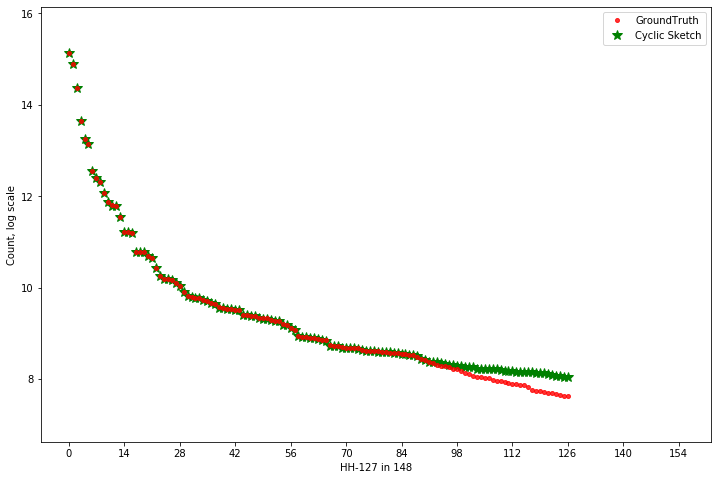

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [13]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename=dataset+'.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=64
d=79
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  15.991 seconds.
Top-256,Sketch:79*64
Top_dict with 31928 bytes.
Sketch with 20352 bytes.
Sk_head with 19264 bytes.
hyperloglog with 4784 bytes.
Total size 74.5390625 kbytes, 

For copy:
Execution time:  15.991 seconds.
Top-256,Sketch:79*64
Top_dict with 31928 bytes.
Sketch with 20352 bytes.
Sk_head with 19264 bytes.
hyperloglog with 4784 bytes.
Total size 74.5390625 kbytes, 
Find 0.932 of Heavy Hitters
Find:138
Top_ARE: 0.0077
Top_AAE: 2.4928
Estimate time:  0.847 seconds.


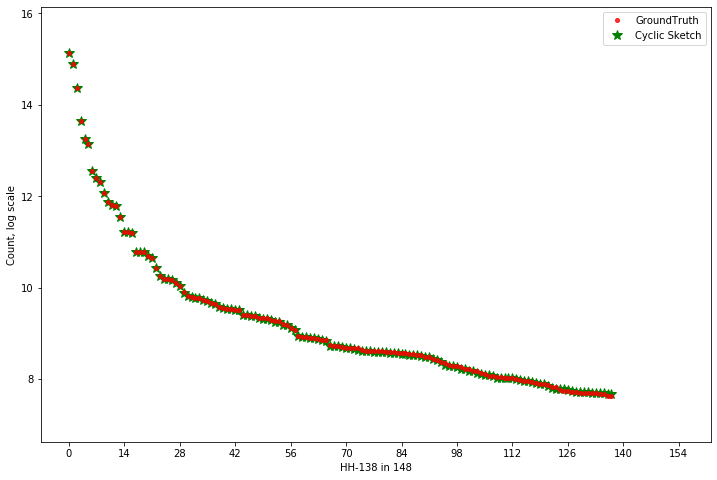

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [12]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=256
topk=256
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  16.823 seconds.
Top-512,Sketch:79*64
Top_dict with 62728 bytes.
Sketch with 20352 bytes.
Sk_head with 20712 bytes.
hyperloglog with 4784 bytes.
Total size 106.03125 kbytes, 

For copy:
Execution time:  16.823 seconds.
Top-512,Sketch:79*64
Top_dict with 62728 bytes.
Sketch with 20352 bytes.
Sk_head with 20712 bytes.
hyperloglog with 4784 bytes.
Total size 106.03125 kbytes, 
Find 0.966 of Heavy Hitters
Find:143
Top_ARE: 0.0044
Top_AAE: 1.3636
Estimate time:  0.812 seconds.


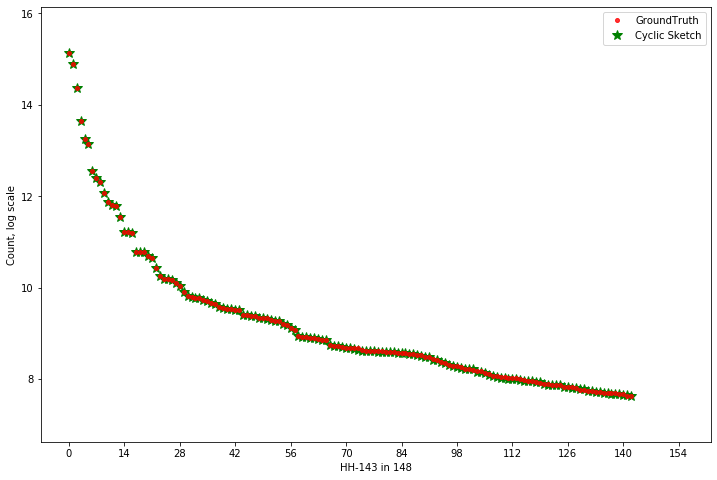

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [11]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=512
topk=512
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  18.135 seconds.
Top-1000,Sketch:79*64
Top_dict with 136848 bytes.
Sketch with 20352 bytes.
Sk_head with 21584 bytes.
hyperloglog with 4784 bytes.
Total size 179.265625 kbytes, 

For copy:
Execution time:  18.135 seconds.
Top-1000,Sketch:79*64
Top_dict with 136848 bytes.
Sketch with 20352 bytes.
Sk_head with 21584 bytes.
hyperloglog with 4784 bytes.
Total size 179.265625 kbytes, 
Find 0.953 of Heavy Hitters
Find:141
Top_ARE: 0.0038
Top_AAE: 1.2270
Estimate time:  0.843 seconds.


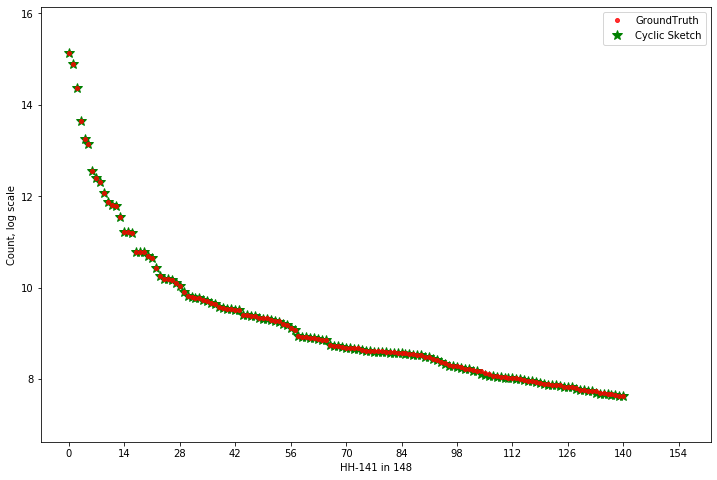

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [10]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=1000
topk=1000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  19.192 seconds.
Top-1500,Sketch:79*64
Top_dict with 233424 bytes.
Sketch with 20352 bytes.
Sk_head with 20648 bytes.
hyperloglog with 4784 bytes.
Total size 272.6640625 kbytes, 

For copy:
Execution time:  19.192 seconds.
Top-1500,Sketch:79*64
Top_dict with 233424 bytes.
Sketch with 20352 bytes.
Sk_head with 20648 bytes.
hyperloglog with 4784 bytes.
Total size 272.6640625 kbytes, 
Find 0.980 of Heavy Hitters
Find:145
Top_ARE: 0.0021
Top_AAE: 0.6069
Estimate time:  1.044 seconds.


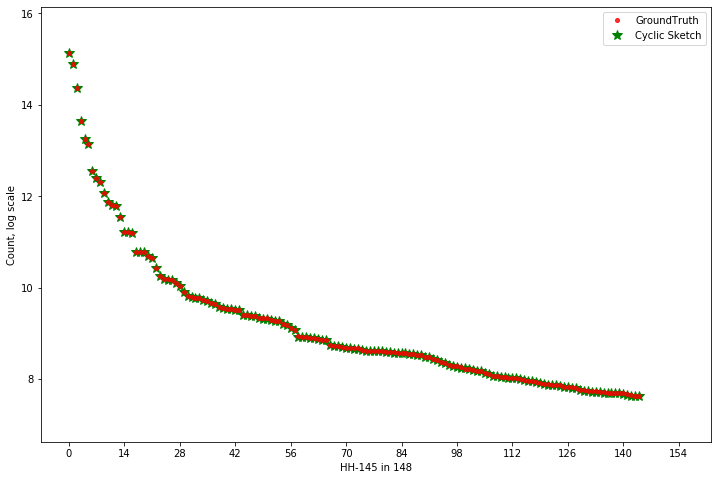

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [9]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=1500
topk=1500
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  22.127 seconds.
Top-2000,Sketch:79*64
Top_dict with 293520 bytes.
Sketch with 20352 bytes.
Sk_head with 23192 bytes.
hyperloglog with 4784 bytes.
Total size 333.8359375 kbytes, 

For copy:
Execution time:  22.127 seconds.
Top-2000,Sketch:79*64
Top_dict with 293520 bytes.
Sketch with 20352 bytes.
Sk_head with 23192 bytes.
hyperloglog with 4784 bytes.
Total size 333.8359375 kbytes, 
Find 0.973 of Heavy Hitters
Find:144
Top_ARE: 0.0019
Top_AAE: 0.5556
Estimate time:  0.824 seconds.


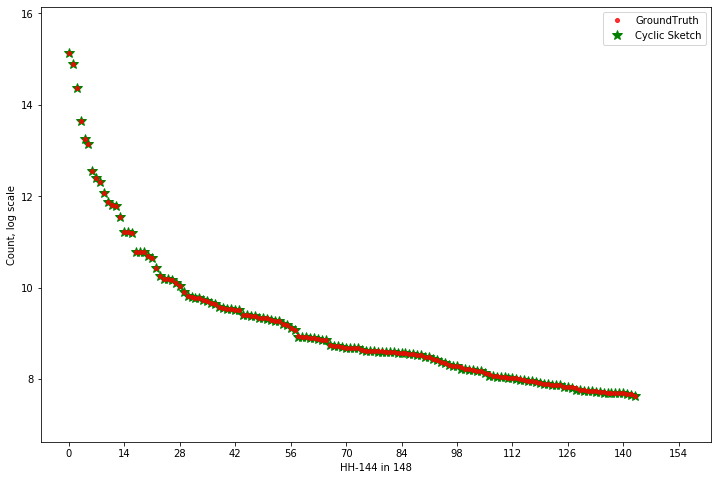

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [8]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=2000
topk=2000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  25.187 seconds.
Top-2500,Sketch:79*64
Top_dict with 341976 bytes.
Sketch with 20352 bytes.
Sk_head with 20848 bytes.
hyperloglog with 4784 bytes.
Total size 378.8671875 kbytes, 

For copy:
Execution time:  25.187 seconds.
Top-2500,Sketch:79*64
Top_dict with 341976 bytes.
Sketch with 20352 bytes.
Sk_head with 20848 bytes.
hyperloglog with 4784 bytes.
Total size 378.8671875 kbytes, 
Find 0.973 of Heavy Hitters
Find:144
Top_ARE: 0.0014
Top_AAE: 0.4306
Estimate time:  1.075 seconds.


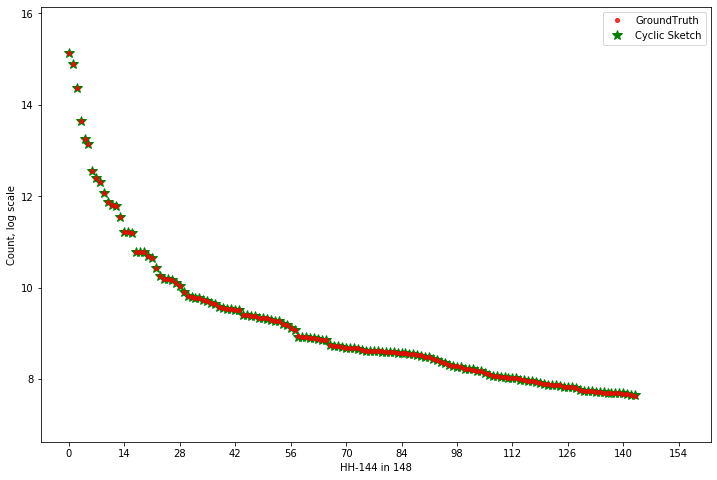

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [7]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=2500
topk=2500
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  23.505 seconds.
Top-3000,Sketch:79*64
Top_dict with 479448 bytes.
Sketch with 20352 bytes.
Sk_head with 21584 bytes.
hyperloglog with 4784 bytes.
Total size 513.8359375 kbytes, 

For copy:
Execution time:  23.505 seconds.
Top-3000,Sketch:79*64
Top_dict with 479448 bytes.
Sketch with 20352 bytes.
Sk_head with 21584 bytes.
hyperloglog with 4784 bytes.
Total size 513.8359375 kbytes, 
Find 0.980 of Heavy Hitters
Find:145
Top_ARE: 0.0016
Top_AAE: 0.4897
Estimate time:  0.883 seconds.


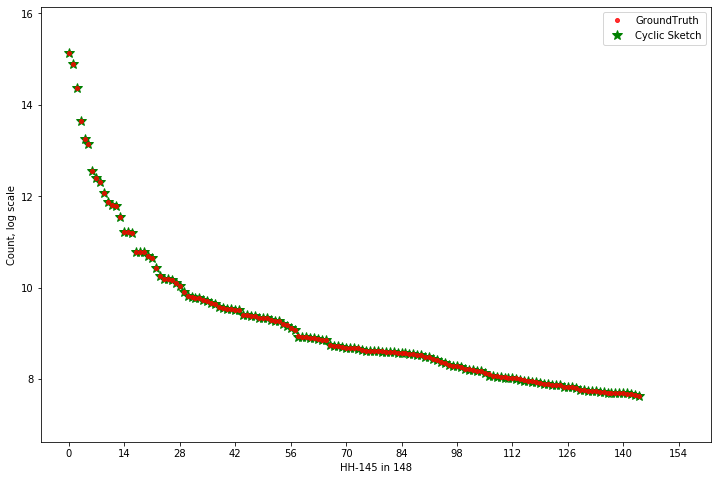

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [6]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=3000
topk=3000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  27.736 seconds.
Top-3500,Sketch:79*64
Top_dict with 546008 bytes.
Sketch with 20352 bytes.
Sk_head with 20728 bytes.
hyperloglog with 4784 bytes.
Total size 578.0 kbytes, 

For copy:
Execution time:  27.736 seconds.
Top-3500,Sketch:79*64
Top_dict with 546008 bytes.
Sketch with 20352 bytes.
Sk_head with 20728 bytes.
hyperloglog with 4784 bytes.
Total size 578.0 kbytes, 
Find 0.966 of Heavy Hitters
Find:143
Top_ARE: 0.0007
Top_AAE: 0.2168
Estimate time:  0.752 seconds.


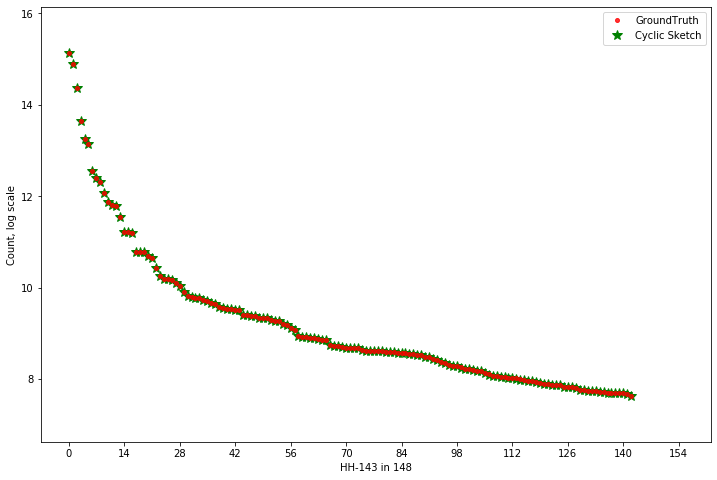

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [5]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=3500
topk=3500
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  30.323 seconds.
Top-4000,Sketch:79*64
Top_dict with 618200 bytes.
Sketch with 20352 bytes.
Sk_head with 20312 bytes.
hyperloglog with 4784 bytes.
Total size 648.09375 kbytes, 

For copy:
Execution time:  30.323 seconds.
Top-4000,Sketch:79*64
Top_dict with 618200 bytes.
Sketch with 20352 bytes.
Sk_head with 20312 bytes.
hyperloglog with 4784 bytes.
Total size 648.09375 kbytes, 
Find 0.980 of Heavy Hitters
Find:145
Top_ARE: 0.0003
Top_AAE: 0.0897
Estimate time:  0.866 seconds.


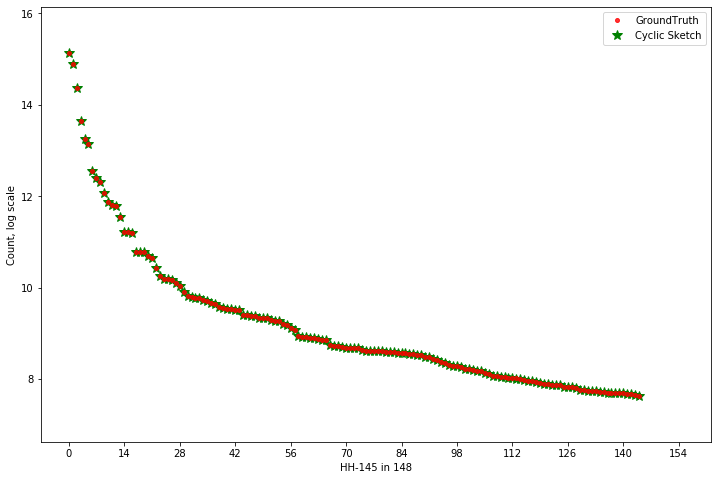

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [4]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=4000
topk=4000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  32.012 seconds.
Top-4500,Sketch:79*64
Top_dict with 668832 bytes.
Sketch with 20352 bytes.
Sk_head with 21776 bytes.
hyperloglog with 4784 bytes.
Total size 698.96875 kbytes, 

For copy:
Execution time:  32.012 seconds.
Top-4500,Sketch:79*64
Top_dict with 668832 bytes.
Sketch with 20352 bytes.
Sk_head with 21776 bytes.
hyperloglog with 4784 bytes.
Total size 698.96875 kbytes, 
Find 0.986 of Heavy Hitters
Find:146
Top_ARE: 0.0005
Top_AAE: 0.1438
Estimate time:  0.803 seconds.


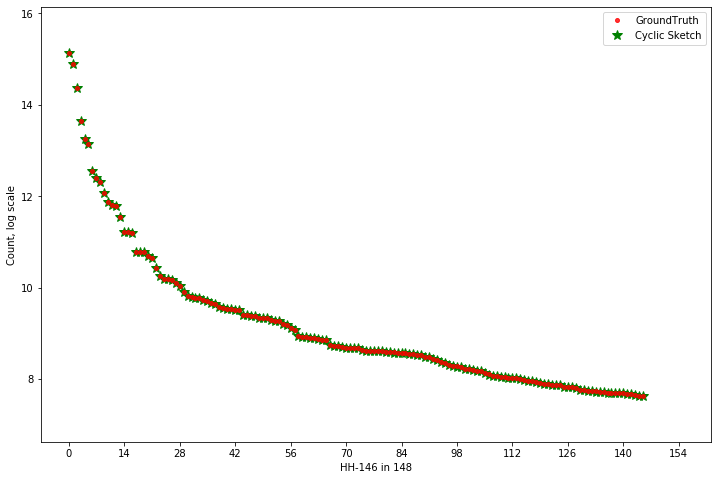

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [3]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=4500
topk=4500
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  32.277 seconds.
Top-5000,Sketch:79*64
Top_dict with 743496 bytes.
Sketch with 20352 bytes.
Sk_head with 20576 bytes.
hyperloglog with 4784 bytes.
Total size 770.7109375 kbytes, 

For copy:
Execution time:  32.277 seconds.
Top-5000,Sketch:79*64
Top_dict with 743496 bytes.
Sketch with 20352 bytes.
Sk_head with 20576 bytes.
hyperloglog with 4784 bytes.
Total size 770.7109375 kbytes, 
Find 0.986 of Heavy Hitters
Find:146
Top_ARE: 0.0003
Top_AAE: 0.0685
Estimate time:  0.711 seconds.


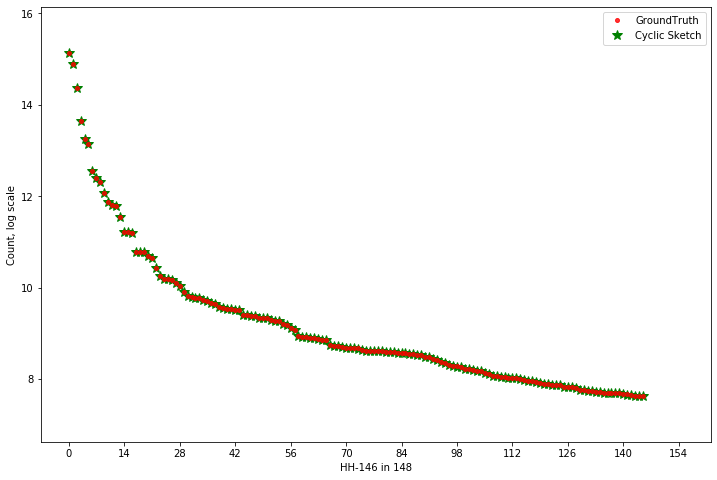

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [1]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=79
size=5000
topk=5000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



In [14]:
len(HH)

148

# fix topk

EOF
Execution time:  12.849 seconds.
Top-148,Sketch:158*128
Top_dict with 17536 bytes.
Sketch with 81024 bytes.
Sk_head with 39896 bytes.
hyperloglog with 4784 bytes.
Total size 139.8828125 kbytes, 

For copy:
Execution time:  12.849 seconds.
Top-148,Sketch:158*128
Top_dict with 17536 bytes.
Sketch with 81024 bytes.
Sk_head with 39896 bytes.
hyperloglog with 4784 bytes.
Total size 139.8828125 kbytes, 
Find 0.912 of Heavy Hitters
Find:135
Top_ARE: 0.0094
Top_AAE: 2.5333
Estimate time:  0.694 seconds.


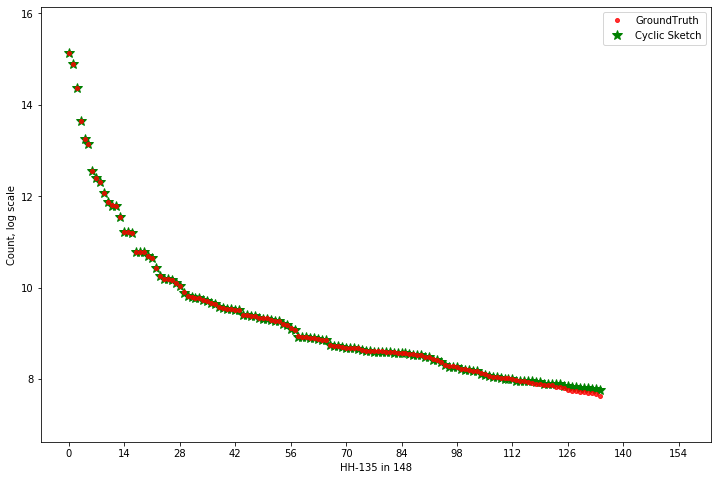

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [16]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=128
d=158
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  15.426 seconds.
Top-148,Sketch:316*256
Top_dict with 17568 bytes.
Sketch with 323712 bytes.
Sk_head with 78600 bytes.
hyperloglog with 4784 bytes.
Total size 414.7109375 kbytes, 

For copy:
Execution time:  15.426 seconds.
Top-148,Sketch:316*256
Top_dict with 17568 bytes.
Sketch with 323712 bytes.
Sk_head with 78600 bytes.
hyperloglog with 4784 bytes.
Total size 414.7109375 kbytes, 
Find 0.966 of Heavy Hitters
Find:143
Top_ARE: 0.0036
Top_AAE: 1.1189
Estimate time:  0.928 seconds.


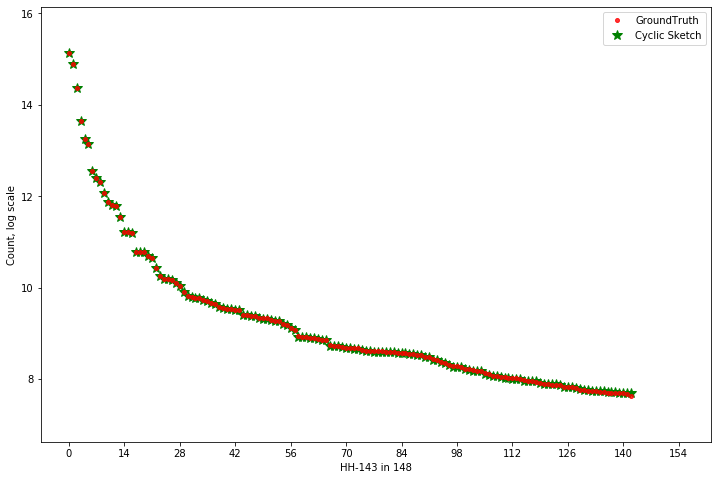

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [17]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=316
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  16.823 seconds.
Top-148,Sketch:632*512
Top_dict with 17688 bytes.
Sketch with 1294464 bytes.
Sk_head with 153392 bytes.
hyperloglog with 4784 bytes.
Total size 1435.8671875 kbytes, 

For copy:
Execution time:  16.823 seconds.
Top-148,Sketch:632*512
Top_dict with 17688 bytes.
Sketch with 1294464 bytes.
Sk_head with 153392 bytes.
hyperloglog with 4784 bytes.
Total size 1435.8671875 kbytes, 
Find 0.980 of Heavy Hitters
Find:145
Top_ARE: 0.0092
Top_AAE: 2.1310
Estimate time:  0.812 seconds.


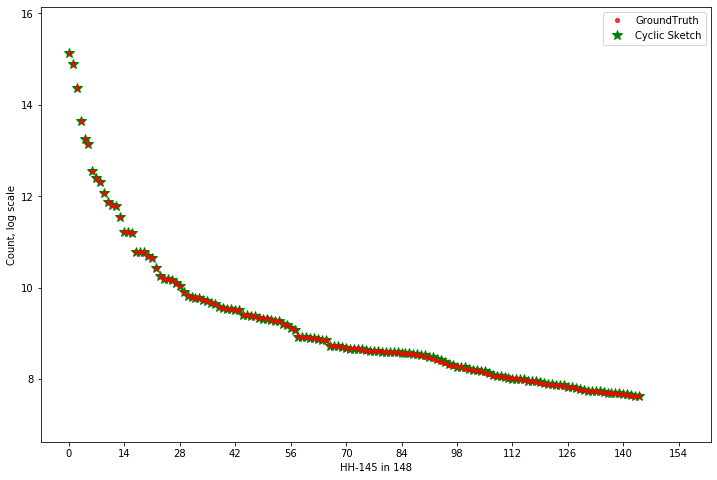

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [18]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=512
d=632
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



# fix w

EOF
Execution time:  14.198 seconds.
Top-148,Sketch:158*64
Top_dict with 17696 bytes.
Sketch with 40576 bytes.
Sk_head with 39792 bytes.
hyperloglog with 4784 bytes.
Total size 100.4375 kbytes, 

For copy:
Execution time:  14.198 seconds.
Top-148,Sketch:158*64
Top_dict with 17696 bytes.
Sketch with 40576 bytes.
Sk_head with 39792 bytes.
hyperloglog with 4784 bytes.
Total size 100.4375 kbytes, 
Find 0.926 of Heavy Hitters
Find:137
Top_ARE: 0.0276
Top_AAE: 6.4964
Estimate time:  0.821 seconds.


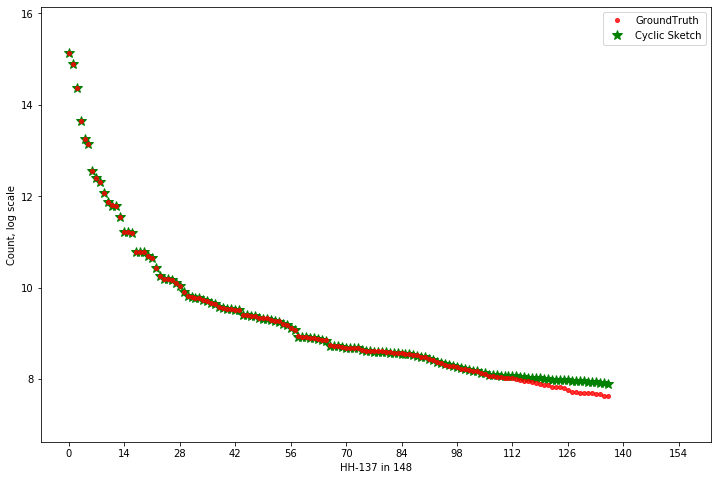

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [19]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=158
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  15.821 seconds.
Top-148,Sketch:316*64
Top_dict with 17512 bytes.
Sketch with 81024 bytes.
Sk_head with 78608 bytes.
hyperloglog with 4784 bytes.
Total size 177.6640625 kbytes, 

For copy:
Execution time:  15.821 seconds.
Top-148,Sketch:316*64
Top_dict with 17512 bytes.
Sketch with 81024 bytes.
Sk_head with 78608 bytes.
hyperloglog with 4784 bytes.
Total size 177.6640625 kbytes, 
Find 0.939 of Heavy Hitters
Find:139
Top_ARE: 0.0150
Top_AAE: 3.6187
Estimate time:  0.942 seconds.


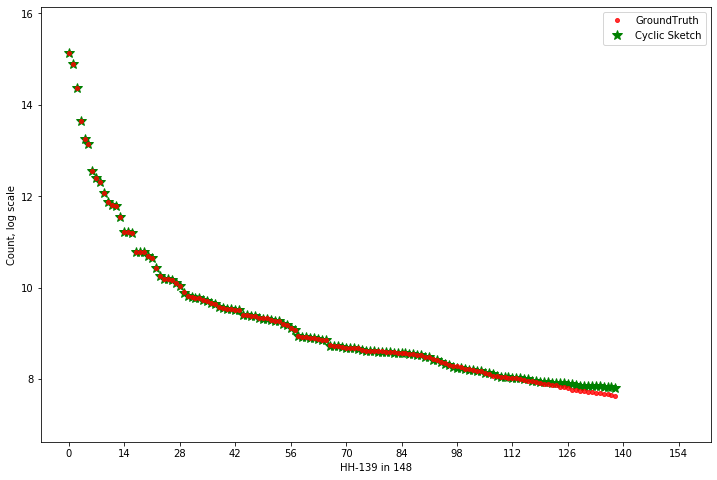

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [20]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=316
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  15.334 seconds.
Top-148,Sketch:632*64
Top_dict with 17576 bytes.
Sketch with 161920 bytes.
Sk_head with 154384 bytes.
hyperloglog with 4784 bytes.
Total size 330.7265625 kbytes, 

For copy:
Execution time:  15.334 seconds.
Top-148,Sketch:632*64
Top_dict with 17576 bytes.
Sketch with 161920 bytes.
Sk_head with 154384 bytes.
hyperloglog with 4784 bytes.
Total size 330.7265625 kbytes, 
Find 0.980 of Heavy Hitters
Find:145
Top_ARE: 0.0081
Top_AAE: 1.9379
Estimate time:  0.794 seconds.


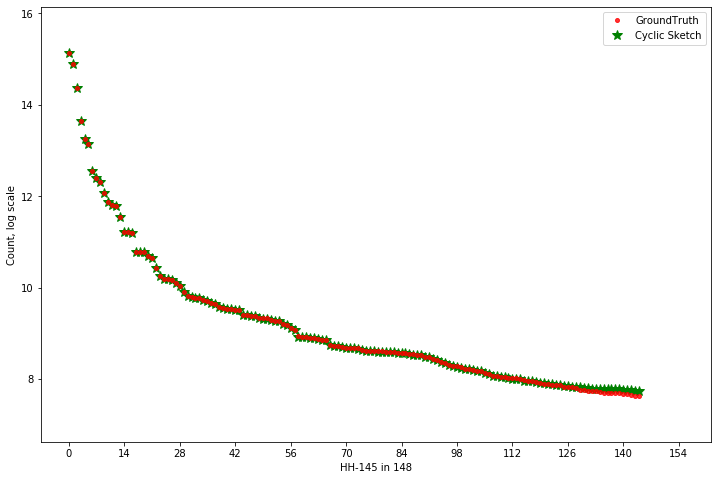

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [21]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=64
d=632
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



# fix d

EOF
Execution time:  15.086 seconds.
Top-148,Sketch:79*128
Top_dict with 17928 bytes.
Sketch with 40576 bytes.
Sk_head with 20352 bytes.
hyperloglog with 4784 bytes.
Total size 81.6796875 kbytes, 

For copy:
Execution time:  15.086 seconds.
Top-148,Sketch:79*128
Top_dict with 17928 bytes.
Sketch with 40576 bytes.
Sk_head with 20352 bytes.
hyperloglog with 4784 bytes.
Total size 81.6796875 kbytes, 
Find 0.899 of Heavy Hitters
Find:133
Top_ARE: 0.0213
Top_AAE: 5.2180
Estimate time:  0.930 seconds.


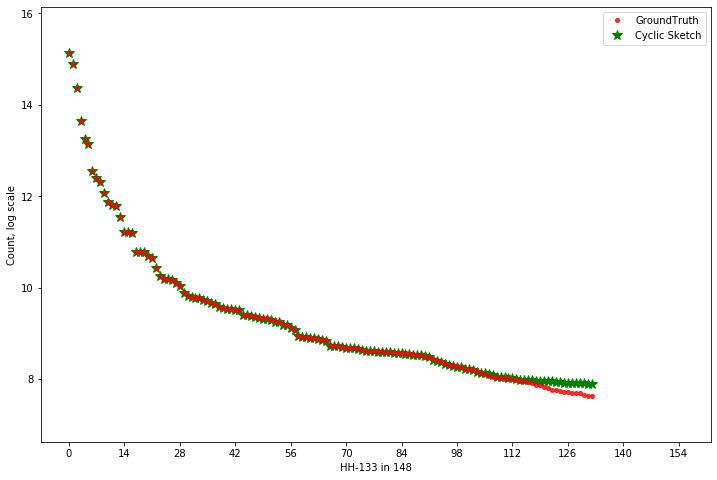

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [22]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=128
d=79
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  14.385 seconds.
Top-148,Sketch:79*256
Top_dict with 17520 bytes.
Sketch with 81024 bytes.
Sk_head with 20632 bytes.
hyperloglog with 4784 bytes.
Total size 121.0546875 kbytes, 

For copy:
Execution time:  14.385 seconds.
Top-148,Sketch:79*256
Top_dict with 17520 bytes.
Sketch with 81024 bytes.
Sk_head with 20632 bytes.
hyperloglog with 4784 bytes.
Total size 121.0546875 kbytes, 
Find 0.953 of Heavy Hitters
Find:141
Top_ARE: 0.0121
Top_AAE: 3.1986
Estimate time:  0.758 seconds.


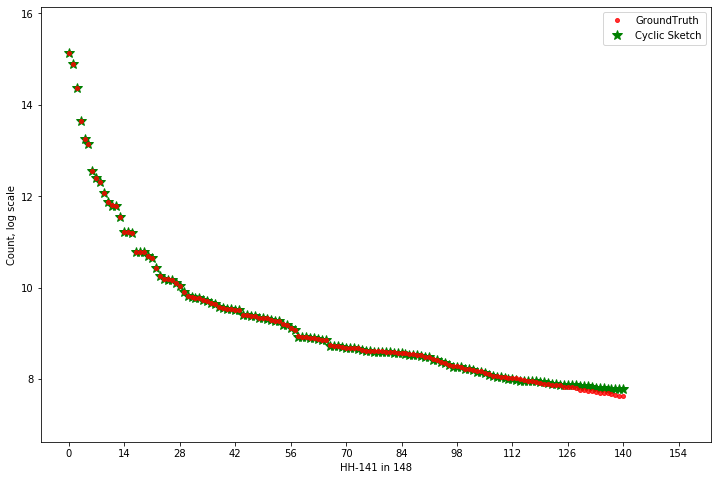

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [23]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=79
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''



EOF
Execution time:  13.851 seconds.
Top-148,Sketch:79*512
Top_dict with 17544 bytes.
Sketch with 161920 bytes.
Sk_head with 20784 bytes.
hyperloglog with 4784 bytes.
Total size 200.2265625 kbytes, 

For copy:
Execution time:  13.851 seconds.
Top-148,Sketch:79*512
Top_dict with 17544 bytes.
Sketch with 161920 bytes.
Sk_head with 20784 bytes.
hyperloglog with 4784 bytes.
Total size 200.2265625 kbytes, 
Find 0.939 of Heavy Hitters
Find:139
Top_ARE: 0.0066
Top_AAE: 2.0360
Estimate time:  0.899 seconds.


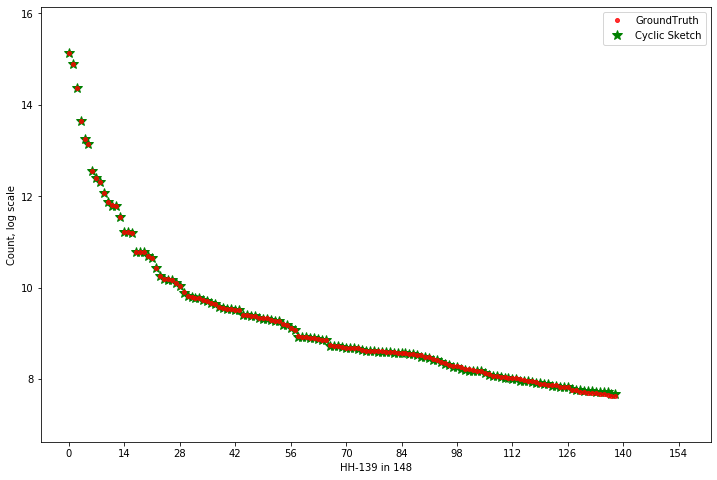

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [24]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=512
d=79
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''


EOF
Execution time:  19.880 seconds.
Top-148,Sketch:79*1024
Top_dict with 17632 bytes.
Sketch with 323712 bytes.
Sk_head with 20728 bytes.
hyperloglog with 4784 bytes.
Total size 358.2578125 kbytes, 

For copy:
Execution time:  19.880 seconds.
Top-148,Sketch:79*1024
Top_dict with 17632 bytes.
Sketch with 323712 bytes.
Sk_head with 20728 bytes.
hyperloglog with 4784 bytes.
Total size 358.2578125 kbytes, 
Find 0.966 of Heavy Hitters
Find:143
Top_ARE: 0.0047
Top_AAE: 1.5315
Estimate time:  0.765 seconds.


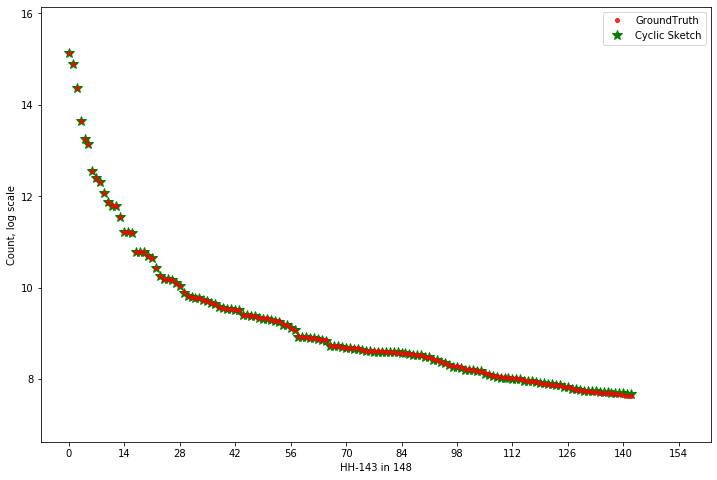

'\n# =============================result to csv=============================\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)\n\nfilename=\'CS_HH_\'+str(len(gr_set))+\'.csv\'\ntopdf=pd.DataFrame(HH.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n'

In [25]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=1024
d=79
size=148
topk=148
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy:")
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{},Sketch:{}*{}".format(len(Top_dict),TC.depth,TC.width))
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_hh_compare(temp,HH,"Cyclic Sketch")

'''
# =============================result to csv=============================
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)

filename='CS_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(HH.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)
'''
